In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données d entraînement
xtrain = pd.read_csv('application_train.csv', sep = ',', low_memory=False )
#xtrain = convert_types(xtrain, print_info=True)
print('forme des données d entraînement: ', xtrain.shape)
xtrain.head(10)

forme des données d entraînement:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Fonctionnalités  des données test
xtest = pd.read_csv('application_test.csv', sep = ',', low_memory=False )
#xtest = convert_types(xtest, print_info=True)
print('forme des fonctionnalités  des données test: ', xtest.shape)
xtest.head(10)

forme des fonctionnalités  des données test:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
train_control = pd.read_csv('application_train_NETTOYEES_NEWS_FEATURES.csv')
test_control = pd.read_csv('application_test_NETTOYEES_NEWS_FEATURES.csv')

In [5]:
xnewtrain = train_control
print('forme des fonctionnalités  des données  d entraînement: ', xnewtrain.shape)
xnewtrain.head(10)

forme des fonctionnalités  des données  d entraînement:  (8602, 130)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0.0,3.0,46,0,1,6588,-42,-2,0,-11
1,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0.0,3.0,10,1,0,15475,-44,-11,-2,-4
2,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0.0,4.0,27,1,0,12430,-31,-6,0,-5
3,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0.0,3.0,13,1,0,11434,-38,-12,-1,-12
4,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,0.0,1.0,37,0,1,16164,-31,-1,0,-8
5,100341,0,0,1,0,1,0,76500.0,545040.0,20677.5,...,0.0,1.0,59,0,1,4651,-55,-19,-4,-7
6,100343,0,0,1,0,1,0,315000.0,90000.0,4504.5,...,0.0,1.0,2,1,0,25874,-29,-1,-14,-9
7,100363,0,0,0,0,1,1,360000.0,493497.0,48942.0,...,0.0,1.0,11,1,0,25921,-40,-1,-3,-12
8,100371,0,0,0,0,1,1,450000.0,808650.0,31464.0,...,0.0,0.0,0,0,0,34878,-40,-1,-8,-9
9,100376,0,0,1,0,1,0,360000.0,254700.0,20250.0,...,0.0,1.0,5,1,0,28312,-51,-3,-23,-5


In [6]:
xnewtest = test_control
print('forme des fonctionnalités  des données test: ', xnewtest.shape)
xnewtest.head(10)

forme des fonctionnalités  des données test:  (1739, 129)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100107,0,1,0,1,0,180000.0,296280.0,21690.0,225000.0,...,1.0,3.0,13,1,0,178192,-37,-2,-15,-11
1,100128,0,0,0,1,1,225000.0,431280.0,23526.0,360000.0,...,3.0,4.0,15,1,0,223039,-30,-5,0,-4
2,100561,0,1,0,1,0,180000.0,67500.0,8140.5,67500.0,...,0.0,2.0,3,1,0,179321,-32,-7,-26,-11
3,100699,0,1,0,1,1,225000.0,323460.0,23134.5,270000.0,...,0.0,3.0,11,1,0,223072,-36,-4,-8,-12
4,100770,0,1,0,0,0,202500.0,697500.0,33687.0,697500.0,...,0.0,0.0,0,0,0,199692,-24,-2,-7,-4
5,100872,0,1,0,1,1,135000.0,1024740.0,49428.0,900000.0,...,0.0,0.0,0,0,0,130881,-30,0,-13,-9
6,101368,0,1,0,1,2,450000.0,675000.0,53460.0,675000.0,...,1.0,1.0,12,1,0,445545,-39,-9,-12,-9
7,101602,0,0,0,0,0,103500.0,453366.0,29101.5,400500.0,...,0.0,3.0,36,0,1,101074,-33,-2,-17,-11
8,101649,0,1,0,0,0,180000.0,267102.0,27499.5,247500.0,...,1.0,2.0,12,1,0,177708,-42,-16,-10,-2
9,101903,0,1,0,1,0,135000.0,265500.0,17869.5,265500.0,...,1.0,1.0,16,1,0,133510,-22,-3,-22,-2


# *          La présentation générale du jeu de données et nettoyage            *


In [7]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [9]:
xtrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
xtrain.duplicated(subset=['SK_ID_CURR']).sum()

0

In [11]:
xtest.duplicated(subset=['SK_ID_CURR']).sum()

0

In [12]:
xtrain.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [13]:
xtest.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [15]:
#Permet d'obtenir la somme des NaN .
xtest.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [16]:
#Permet d'obtenir la somme des NaN .
xtrain.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [17]:
#Calcul du pourcentage par colonnes des NaN
PourcentxtestNaN=((xtest.isna().sum()*100)/len(xtest))

In [18]:
#Calcul du pourcentage par colonnes des NaN
PourcentxtrainNaN=((xtrain.isna().sum()*100)/len(xtrain))

In [19]:
print(PourcentxtestNaN)

SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.049237
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  1.868948
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.289184
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [20]:
print(PourcentxtrainNaN)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [21]:
#Pourcentage par colonnes des NaN
PourcentxtestNaN

SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.049237
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  1.868948
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.289184
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [22]:
#Pourcentage par colonnes des NaN
PourcentxtrainNaN

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [23]:
xtest.dropna(inplace=True)

In [24]:
xtrain.dropna(inplace=True)

In [25]:
xtest.max()

SK_ID_CURR                                             455959
NAME_CONTRACT_TYPE                            Revolving loans
CODE_GENDER                                                 M
FLAG_OWN_CAR                                                Y
FLAG_OWN_REALTY                                             Y
CNT_CHILDREN                                                4
AMT_INCOME_TOTAL                                     1.35e+06
AMT_CREDIT                                         2.1564e+06
AMT_ANNUITY                                            177696
AMT_GOODS_PRICE                                       1.8e+06
NAME_TYPE_SUITE                                 Unaccompanied
NAME_INCOME_TYPE                                      Working
NAME_EDUCATION_TYPE             Secondary / secondary special
NAME_FAMILY_STATUS                                      Widow
NAME_HOUSING_TYPE                                With parents
REGION_POPULATION_RELATIVE                           0.072508
DAYS_BIR

In [26]:
xtrain.max()

SK_ID_CURR                                             456226
TARGET                                                      1
NAME_CONTRACT_TYPE                            Revolving loans
CODE_GENDER                                                 M
FLAG_OWN_CAR                                                Y
FLAG_OWN_REALTY                                             Y
CNT_CHILDREN                                                5
AMT_INCOME_TOTAL                                      4.5e+06
AMT_CREDIT                                           4.05e+06
AMT_ANNUITY                                            225000
AMT_GOODS_PRICE                                      4.05e+06
NAME_TYPE_SUITE                                 Unaccompanied
NAME_INCOME_TYPE                                      Working
NAME_EDUCATION_TYPE             Secondary / secondary special
NAME_FAMILY_STATUS                                      Widow
NAME_HOUSING_TYPE                                With parents
REGION_P

In [27]:
pd.reset_option("^display")

#  Régression ridge à noyau

In [28]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in xtrain.columns:
    if xtrain[col].dtype == 'object':
        xtrain[col] = labelencoder.fit_transform(xtrain[col])

xtrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [29]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(41)
memory usage: 7.5 MB


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in xtest.columns:
    if xtest[col].dtype == 'object':
        xtest[col] = labelencoder.fit_transform(xtest[col])

xtest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15,100107,0,1,0,1,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
18,100128,0,0,0,1,1,225000.0,431280.0,23526.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
73,100561,0,1,0,1,0,180000.0,67500.0,8140.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
86,100699,0,1,0,1,1,225000.0,323460.0,23134.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
102,100770,0,1,0,0,0,202500.0,697500.0,33687.0,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 15 to 48710
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(40)
memory usage: 1.5 MB


In [32]:
# one-hot encoding of categorical variables
xtrain = pd.get_dummies(xtrain)
xtest = pd.get_dummies(xtest)

print('Training Features shape: ', xtrain.shape)
print('Testing Features shape: ', xtest.shape)

Training Features shape:  (8602, 122)
Testing Features shape:  (1739, 121)


In [33]:
xtrain1 = xtrain
xtrain1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,0,0,0,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,0,0,0,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,0,0,0,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,0,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [34]:
xtrain1 = xtrain1.drop(xtrain1.columns[[1]], axis='columns')
xtrain1 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,0,0,1,2,112500.0,361462.5,16051.5,274500.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,0,0,1,1,99000.0,675000.0,21906.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,0,0,0,1,1,261000.0,711454.5,47673.0,643500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,1,0,94500.0,270000.0,15075.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [35]:
# créer la matrice de données
X = xtrain1.values

# créer le vecteur d'étiquettes
y = xtrain['TARGET'].values

# transformer en un problème de classification binaire
#y_class = np.where(y<6, 0, 1)
#y_class = np.where(y<1, 0, 1)

In [36]:
#Séparation des données en un jeu d’entraînement et un jeu de test. Le jeu de test sera stratifié


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

In [37]:
# créer un jeu d'entrainement et un jeu de test (30% des données)
from sklearn import model_selection
#X_train, X_test, y_train, y_test = \
#    model_selection.train_test_split(X, y, test_size=0.3)
                                
#Standardardisation des données d’entraînement et application de la même transformation aux données de test
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)           

In [38]:
X

array([[1.00083e+05, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.00000e+00],
       [1.00145e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.00000e+00],
       [1.00179e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.00000e+00],
       ...,
       [4.56140e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.56195e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.00000e+00],
       [4.56226e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [39]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred1 = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1))
print("RMSE1: {:.2f}".format(rmse1))


RMSE1: 0.24


RMSE1: 0.24


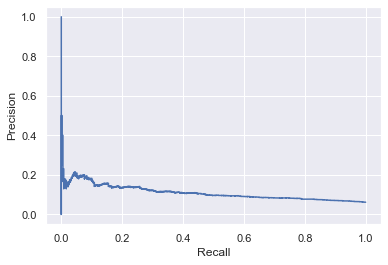

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE1: {:.2f}".format(rmse1))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE1: 0.24


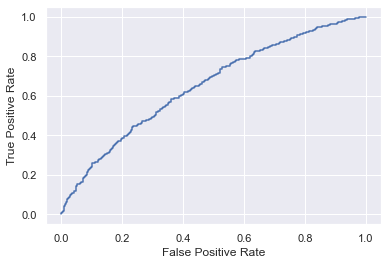

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE1: {:.2f}".format(rmse1))
fpr, tpr, _ = roc_curve(y_test, y_test_pred1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE1: 0.24


Text(0, 0.5, 'Sensibilite')

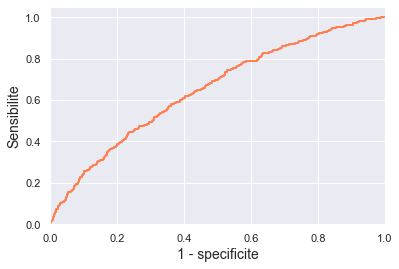

In [42]:
print("RMSE1: {:.2f}".format(rmse1))
[fpr1, tpr1, thr1] = metrics.roc_curve(y_test, y_test_pred1)
plt.plot(fpr1, tpr1, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [43]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=50)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred2 = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2))
print("RMSE2: {:.2f}".format(rmse2))


RMSE2: 0.25


RMSE2: 0.25


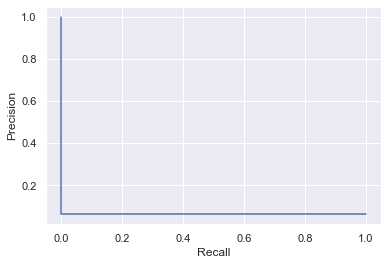

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE2: {:.2f}".format(rmse2))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred2)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE2: 0.25


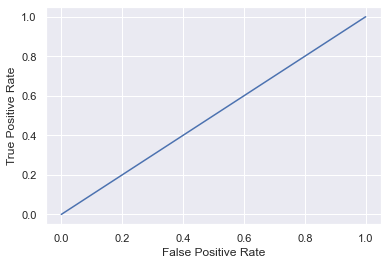

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE2: {:.2f}".format(rmse2))
fpr, tpr, _ = roc_curve(y_test, y_test_pred2)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE2: 0.25


Text(0, 0.5, 'Sensibilite')

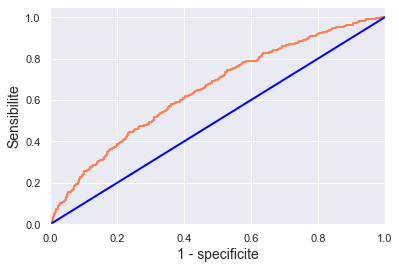

In [46]:
print("RMSE2: {:.2f}".format(rmse2))
[fpr2, tpr2, thr2] = metrics.roc_curve(y_test, y_test_pred2)
plt.plot(fpr1, tpr1, color='coral', lw=2)
plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [47]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=10)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred3 = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3))
print("RMSE3: {:.2f}".format(rmse3))


RMSE3: 0.25


RMSE3: 0.25


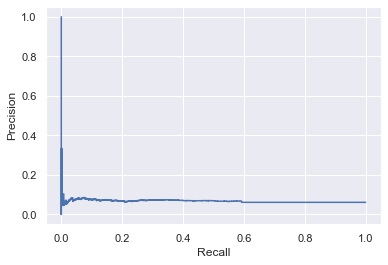

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE3: {:.2f}".format(rmse3))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred3)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE3: 0.25


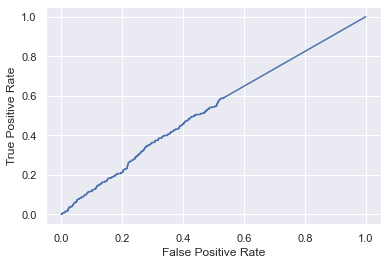

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE3: {:.2f}".format(rmse3))
fpr, tpr, _ = roc_curve(y_test, y_test_pred3)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE3: 0.25


Text(0, 0.5, 'Sensibilite')

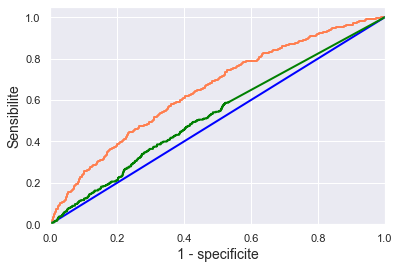

In [50]:
print("RMSE3: {:.2f}".format(rmse3))
[fpr3, tpr3, thr3] = metrics.roc_curve(y_test, y_test_pred3)
plt.plot(fpr1, tpr1, color='coral', lw=2)
plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [51]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv4 = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv4 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv4))
print("RMSE4: {:.2f}".format(rmse_cv4))

RMSE4: 0.24


RMSE4: 0.24


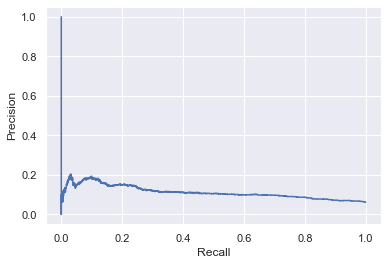

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE4: {:.2f}".format(rmse_cv4))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred_cv4)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE4: 0.24


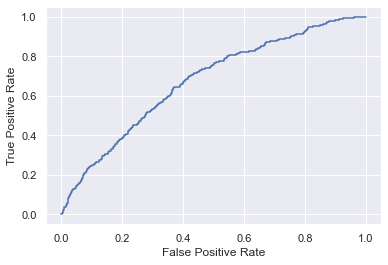

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE4: {:.2f}".format(rmse_cv4))
fpr, tpr, _ = roc_curve(y_test, y_test_pred_cv4)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [54]:
grid_pred

GridSearchCV(cv=5, estimator=KernelRidge(kernel='rbf'),
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='neg_mean_squared_error')

RMSE4: 0.24


Text(0, 0.5, 'Sensibilite')

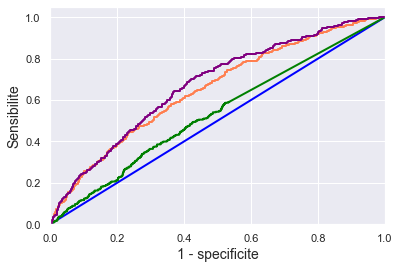

In [55]:
print("RMSE4: {:.2f}".format(rmse_cv4))
[fpr4, tpr4, thr4] = metrics.roc_curve(y_test, y_test_pred_cv4)
plt.plot(fpr1, tpr1, color='coral', lw=2)
plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.plot(fpr4, tpr4, color='purple', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [56]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=1)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred5 = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse5 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred5))
print("RMSE5: {:.2f}".format(rmse5))


RMSE5: 0.25


RMSE5: 0.25


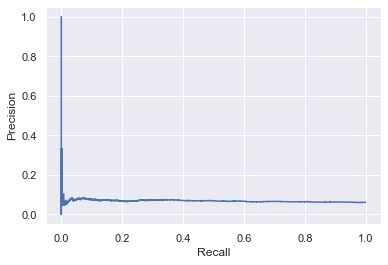

In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE5: {:.2f}".format(rmse5))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred5)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE5: 0.25


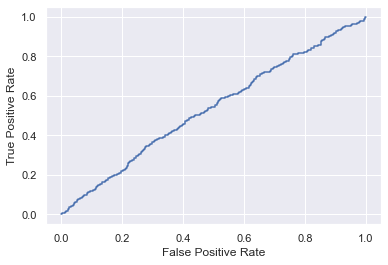

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE5: {:.2f}".format(rmse5))
fpr, tpr, _ = roc_curve(y_test, y_test_pred5)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE5: 0.25


Text(0, 0.5, 'Sensibilite')

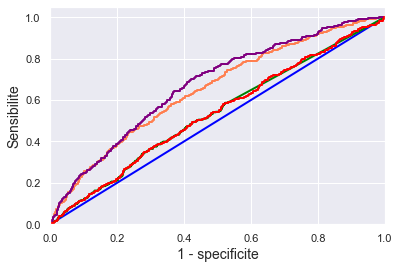

In [59]:
print("RMSE5: {:.2f}".format(rmse5))
[fpr5, tpr5, thr5] = metrics.roc_curve(y_test, y_test_pred5)
plt.plot(fpr1, tpr1, color='coral', lw=2)
plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.plot(fpr4, tpr4, color='purple', lw=2)
plt.plot(fpr5, tpr5, color='red', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [60]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=10.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.0001)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred6 = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse6 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred6))
print("RMSE6: {:.2f}".format(rmse6))

RMSE6: 0.24


RMSE6: 0.24


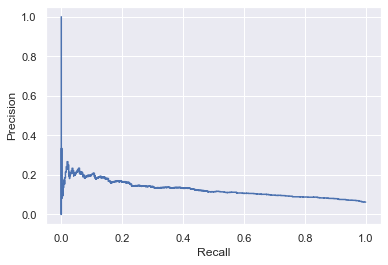

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE6: {:.2f}".format(rmse6))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred6)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE6: 0.24


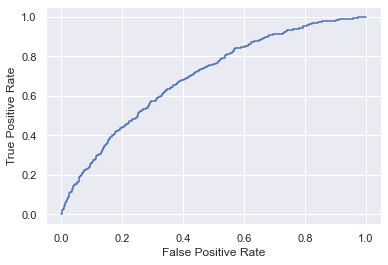

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE6: {:.2f}".format(rmse6))
fpr, tpr, _ = roc_curve(y_test, y_test_pred6)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE6: 0.24


Text(0, 0.5, 'Sensibilite')

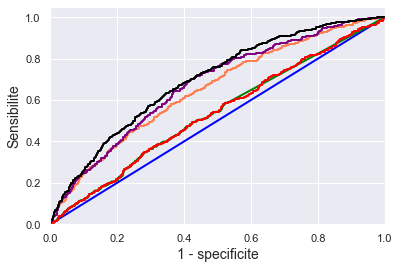

In [63]:
print("RMSE6: {:.2f}".format(rmse6))
[fpr6, tpr6, thr6] = metrics.roc_curve(y_test, y_test_pred6)
plt.plot(fpr1, tpr1, color='coral', lw=2)
plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.plot(fpr4, tpr4, color='purple', lw=2)
plt.plot(fpr5, tpr5, color='red', lw=2)
plt.plot(fpr6, tpr6, color='black', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

# Régression ridge à noyau avec nouvelle features

In [64]:
xnewtrain1 = xnewtrain
xnewtrain1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0.0,3.0,46,0,1,6588,-42,-2,0,-11
1,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0.0,3.0,10,1,0,15475,-44,-11,-2,-4
2,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0.0,4.0,27,1,0,12430,-31,-6,0,-5
3,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0.0,3.0,13,1,0,11434,-38,-12,-1,-12
4,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,0.0,1.0,37,0,1,16164,-31,-1,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,456083,0,0,0,0,1,2,112500.0,361462.5,16051.5,...,0.0,0.0,0,0,0,8037,-41,-3,-4,-6
8598,456084,0,0,0,0,1,1,99000.0,675000.0,21906.0,...,0.0,0.0,0,0,0,6424,-38,-5,-6,-3
8599,456140,1,0,0,0,1,1,261000.0,711454.5,47673.0,...,0.0,1.0,22,1,0,17777,-31,-4,-25,-8
8600,456195,0,0,0,0,1,0,94500.0,270000.0,15075.0,...,0.0,3.0,23,1,0,6618,-55,-14,-15,-10


In [65]:
xnewtrain1 = xnewtrain1.drop(xnewtrain1.columns[[1]], axis='columns')
xnewtrain1 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100083,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0.0,3.0,46,0,1,6588,-42,-2,0,-11
1,100145,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0.0,3.0,10,1,0,15475,-44,-11,-2,-4
2,100179,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0.0,4.0,27,1,0,12430,-31,-6,0,-5
3,100190,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0.0,3.0,13,1,0,11434,-38,-12,-1,-12
4,100295,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,0.0,1.0,37,0,1,16164,-31,-1,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,456083,0,0,0,1,2,112500.0,361462.5,16051.5,274500.0,...,0.0,0.0,0,0,0,8037,-41,-3,-4,-6
8598,456084,0,0,0,1,1,99000.0,675000.0,21906.0,675000.0,...,0.0,0.0,0,0,0,6424,-38,-5,-6,-3
8599,456140,0,0,0,1,1,261000.0,711454.5,47673.0,643500.0,...,0.0,1.0,22,1,0,17777,-31,-4,-25,-8
8600,456195,0,0,0,1,0,94500.0,270000.0,15075.0,270000.0,...,0.0,3.0,23,1,0,6618,-55,-14,-15,-10


In [66]:
# créer la matrice de données
X1 = xnewtrain1.values

# créer le vecteur d'étiquettes
y1 = xnewtrain['TARGET'].values

# transformer en un problème de classification binaire
#y_class = np.where(y<6, 0, 1)
#y_class1 = np.where(y1<1, 0, 1)

In [67]:
#Séparation des données en un jeu d’entraînement et un jeu de test. Le jeu de test sera stratifié


from sklearn import model_selection
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1, y1, stratify=y1, test_size=0.7, random_state=42)

In [68]:
# créer un jeu d'entrainement et un jeu de test (30% des données)
from sklearn import model_selection
#X_train1, X_test1, y_train1, y_test1 = \
#    model_selection.train_test_split(X1, y_class1, test_size=0.3)

#Standardardisation des données d’entraînement et application de la même transformation aux données de test
from sklearn import preprocessing
std_scale1 = preprocessing.StandardScaler().fit(X_train1)

X_train1_std = std_scale1.transform(X_train1)
X_test1_std = std_scale1.transform(X_test1)

In [69]:
X1

array([[ 1.00083e+05,  0.00000e+00,  1.00000e+00, ..., -2.00000e+00,
         0.00000e+00, -1.10000e+01],
       [ 1.00145e+05,  0.00000e+00,  0.00000e+00, ..., -1.10000e+01,
        -2.00000e+00, -4.00000e+00],
       [ 1.00179e+05,  0.00000e+00,  0.00000e+00, ..., -6.00000e+00,
         0.00000e+00, -5.00000e+00],
       ...,
       [ 4.56140e+05,  0.00000e+00,  0.00000e+00, ..., -4.00000e+00,
        -2.50000e+01, -8.00000e+00],
       [ 4.56195e+05,  0.00000e+00,  0.00000e+00, ..., -1.40000e+01,
        -1.50000e+01, -1.00000e+01],
       [ 4.56226e+05,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
        -6.00000e+00, -2.00000e+00]])

In [70]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train1_std, y_train1)

# prédire sur le jeu de test
y_test_pred1nf = predicteur.predict(X_test1_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse1nf = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1nf))
print("RMSE1nf: {:.2f}".format(rmse1nf))

RMSE1nf: 0.24


RMSE1nf: 0.24


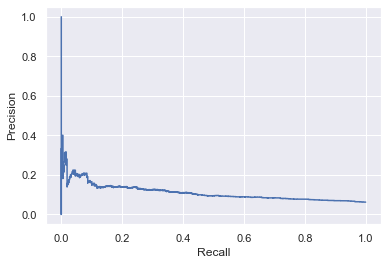

In [71]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE1nf: {:.2f}".format(rmse1nf))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred1nf)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE1nf: 0.24


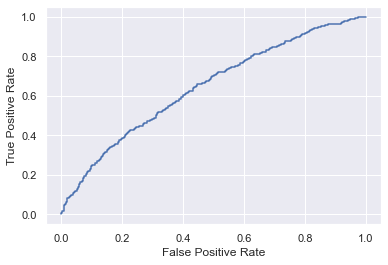

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE1nf: {:.2f}".format(rmse1nf))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred1nf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE1nf: 0.24


Text(0, 0.5, 'Sensibilite')

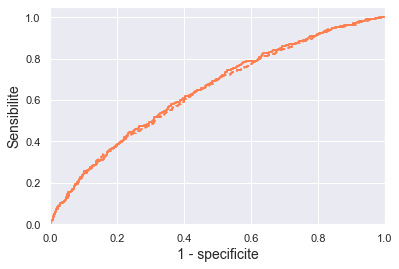

In [73]:
print("RMSE1nf: {:.2f}".format(rmse1nf))
[fpr1nf, tpr1nf, thr1nf] = metrics.roc_curve(y_test1, y_test_pred1nf)
#Sans nouvelles features
plt.plot(fpr1, tpr1, color='coral', lw=2)
#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [74]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=50)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train1_std, y_train1)

# prédire sur le jeu de test
y_test_pred2nf = predicteur.predict(X_test1_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse2nf = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred2nf))
print("RMSE2nf: {:.2f}".format(rmse2nf))


RMSE2nf: 0.25


RMSE2nf: 0.25


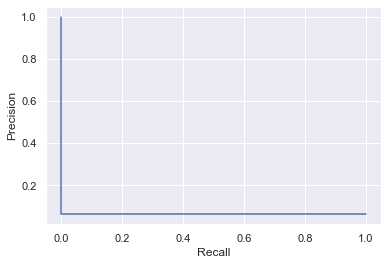

In [75]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE2nf: {:.2f}".format(rmse2nf))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred2nf)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE2nf: 0.25


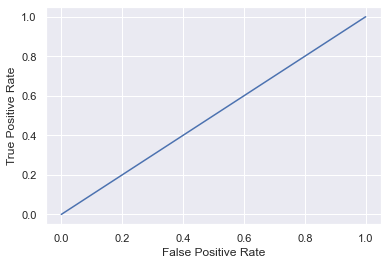

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE2nf: {:.2f}".format(rmse2nf))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred2nf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE2nf: 0.25


Text(0, 0.5, 'Sensibilite')

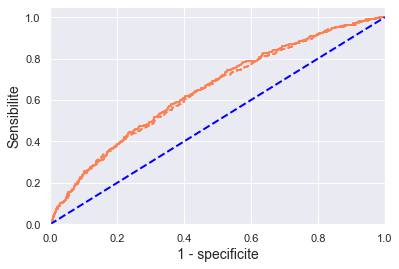

In [77]:
print("RMSE2nf: {:.2f}".format(rmse2nf))
[fpr2nf, tpr2nf, thr2nf] = metrics.roc_curve(y_test1, y_test_pred2nf)
#Sans nouvelles features
plt.plot(fpr1, tpr1, color='coral', lw=2)
#plt.plot(fpr2, tpr2, color='blue', lw=2)

#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [78]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=10)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train1_std, y_train1)

# prédire sur le jeu de test
y_test_pred3nf = predicteur.predict(X_test1_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse3nf = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred3nf))
print("RMSE3nf : {:.2f}".format(rmse3nf))


RMSE3nf : 0.25


RMSE3nf : 0.25


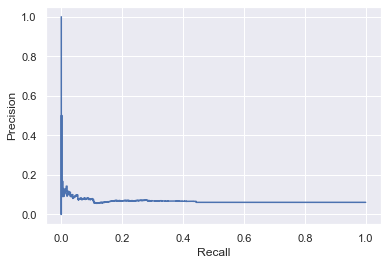

In [79]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE3nf : {:.2f}".format(rmse3nf))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred3nf)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE3nf : 0.25


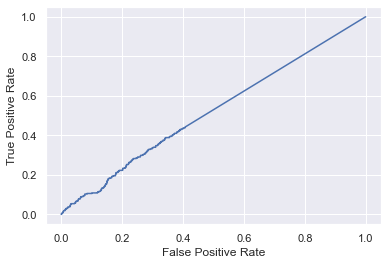

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE3nf : {:.2f}".format(rmse3nf))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred3nf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE3nf : 0.25


Text(0, 0.5, 'Sensibilite')

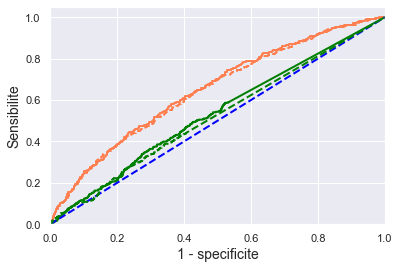

In [81]:
print("RMSE3nf : {:.2f}".format(rmse3nf))
[fpr3nf, tpr3nf, thr3nf] = metrics.roc_curve(y_test1, y_test_pred3nf)
#Sans nouvelles features
plt.plot(fpr1, tpr1, color='coral', lw=2)
#plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)

#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
plt.plot(fpr3nf, tpr3nf, color='green', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [82]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train1_std, y_train1)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv4nf = grid_pred.predict(X_test1_std)

# calculer la RMSE correspondante
rmse_cv4nf = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv4nf))
print("RMSE4nf : {:.2f}".format(rmse_cv4nf))

RMSE4nf : 0.24


RMSE4nf : 0.24


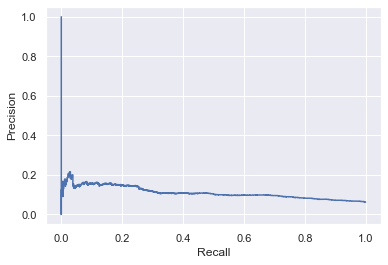

In [83]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE4nf : {:.2f}".format(rmse_cv4nf))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred_cv4nf)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE4nf : 0.24


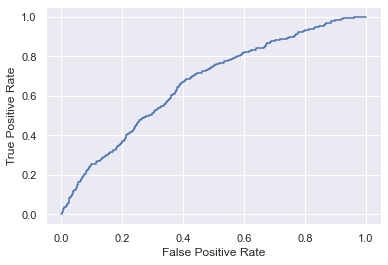

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE4nf : {:.2f}".format(rmse_cv4nf))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred_cv4nf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [85]:
grid_pred

GridSearchCV(cv=5, estimator=KernelRidge(kernel='rbf'),
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='neg_mean_squared_error')

RMSE4nf : 0.24


Text(0, 0.5, 'Sensibilite')

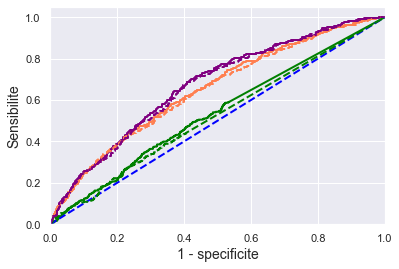

In [86]:
print("RMSE4nf : {:.2f}".format(rmse_cv4nf))
[fpr4nf, tpr4nf, thr4nf] = metrics.roc_curve(y_test1, y_test_pred_cv4nf)

#Sans nouvelles features
plt.plot(fpr1, tpr1, color='coral', lw=2)
#plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.plot(fpr4, tpr4, color='purple', lw=2)

#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
plt.plot(fpr3nf, tpr3nf, color='green', lw=2,linestyle='--')
plt.plot(fpr4nf, tpr4nf, color='purple', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [87]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=1)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train1_std, y_train1)

# prédire sur le jeu de test
y_test_pred5nf = predicteur.predict(X_test1_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse5nf = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred5nf))
print("RMSE5nf : {:.2f}".format(rmse5nf))


RMSE5nf : 0.25


RMSE5nf : 0.25


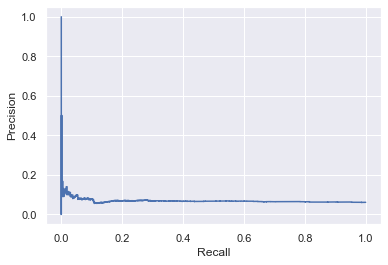

In [88]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE5nf : {:.2f}".format(rmse5nf))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred5nf)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE5nf : 0.25


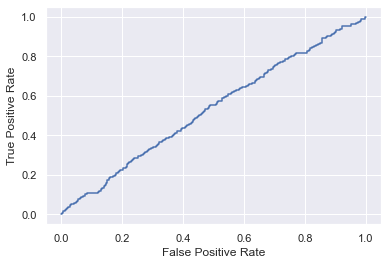

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE5nf : {:.2f}".format(rmse5nf))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred5nf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE5nf : 0.25


Text(0, 0.5, 'Sensibilite')

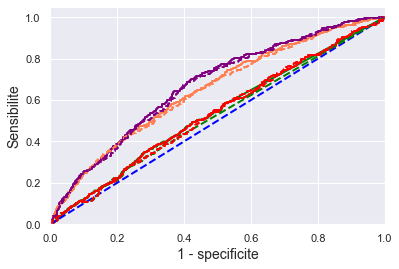

In [90]:
print("RMSE5nf : {:.2f}".format(rmse5nf))
[fpr5nf, tpr5nf, thr5nf] = metrics.roc_curve(y_test1, y_test_pred5nf)

#Sans nouvelles features
plt.plot(fpr1, tpr1, color='coral', lw=2)
#plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.plot(fpr4, tpr4, color='purple', lw=2)
plt.plot(fpr5, tpr5, color='red', lw=2)

#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
plt.plot(fpr3nf, tpr3nf, color='green', lw=2,linestyle='--')
plt.plot(fpr4nf, tpr4nf, color='purple', lw=2,linestyle='--')
plt.plot(fpr5nf, tpr5nf, color='red', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [91]:
import numpy as np
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=10.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.0001)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train1_std, y_train1)

# prédire sur le jeu de test
y_test_pred6nf = predicteur.predict(X_test1_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse6nf = np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred6nf))
print("RMSE6nf : {:.2f}".format(rmse6nf))

RMSE6nf : 0.24


RMSE6nf : 0.24


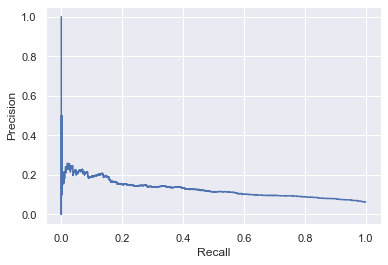

In [92]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("RMSE6nf : {:.2f}".format(rmse6nf))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred6nf)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

RMSE6nf : 0.24


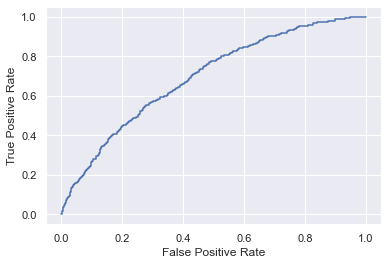

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("RMSE6nf : {:.2f}".format(rmse6nf))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred6nf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

RMSE6nf : 0.24


Text(0, 0.5, 'Sensibilite')

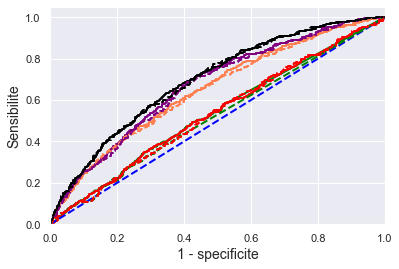

In [94]:
print("RMSE6nf : {:.2f}".format(rmse6nf))
[fpr6nf, tpr6nf, thr6nf] = metrics.roc_curve(y_test1, y_test_pred6nf)

#Sans nouvelles features
plt.plot(fpr1, tpr1, color='coral', lw=2)
#plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.plot(fpr4, tpr4, color='purple', lw=2)
plt.plot(fpr5, tpr5, color='red', lw=2)
plt.plot(fpr6, tpr6, color='black', lw=2)

#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
plt.plot(fpr3nf, tpr3nf, color='green', lw=2,linestyle='--')
plt.plot(fpr4nf, tpr4nf, color='purple', lw=2,linestyle='--')
plt.plot(fpr5nf, tpr5nf, color='red', lw=2,linestyle='--')
plt.plot(fpr6nf, tpr6nf, color='black', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

RMSE6nf : 0.24


Text(0, 0.5, 'Sensibilite')

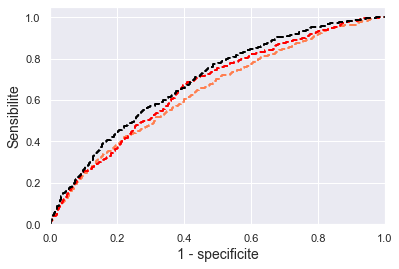

In [95]:
print("RMSE6nf : {:.2f}".format(rmse6nf))
[fpr6nf, tpr6nf, thr6nf] = metrics.roc_curve(y_test1, y_test_pred6nf)

#Sans nouvelles features
#plt.plot(fpr1, tpr1, color='coral', lw=2)
#plt.plot(fpr2, tpr2, color='blue', lw=2)
#plt.plot(fpr3, tpr3, color='green', lw=2)
#plt.plot(fpr4, tpr4, color='purple', lw=2)
#plt.plot(fpr5, tpr5, color='red', lw=2)
#plt.plot(fpr6, tpr6, color='black', lw=2)

#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
#plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
#plt.plot(fpr3nf, tpr3nf, color='green', lw=2,linestyle='--')
plt.plot(fpr4nf, tpr4nf, color='red', lw=2,linestyle='--')
#plt.plot(fpr5nf, tpr5nf, color='purple', lw=2,linestyle='--')
plt.plot(fpr6nf, tpr6nf, color='black', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

# Comparaison avec une approche naïve

### Approche naïve sans nouvelles features

In [96]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

Text(0, 0.5, 'Sensibilite')

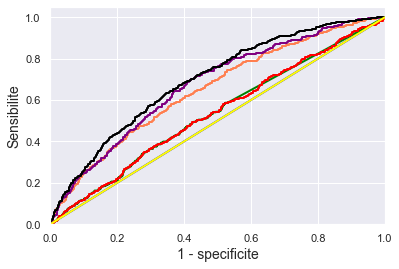

In [97]:
[fpr7, tpr7, thr7] = metrics.roc_curve(y_test, y_pred_random)

#Sans nouvelles features
plt.plot(fpr1, tpr1, color='coral', lw=2)
plt.plot(fpr2, tpr2, color='blue', lw=2)
plt.plot(fpr3, tpr3, color='green', lw=2)
plt.plot(fpr4, tpr4, color='purple', lw=2)
plt.plot(fpr5, tpr5, color='red', lw=2)
plt.plot(fpr6, tpr6, color='black', lw=2)
plt.plot(fpr7, tpr7, color='yellow', lw=2)

#Avec nouvelles features
#plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
#plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
#plt.plot(fpr3nf, tpr3nf, color='green', lw=2,linestyle='--')
#plt.plot(fpr4nf, tpr4nf, color='purple', lw=2,linestyle='--')
#plt.plot(fpr5nf, tpr5nf, color='red', lw=2,linestyle='--')
#plt.plot(fpr6nf, tpr6nf, color='black', lw=2,linestyle='--')
#plt.plot(fpr7nf, tpr7nf, color='yellow', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

### Approche naïve avec nouvelles features

In [98]:
y_pred_random1 = np.random.randint(np.min(y1), np.max(y1), y_test1.shape)

Text(0, 0.5, 'Sensibilite')

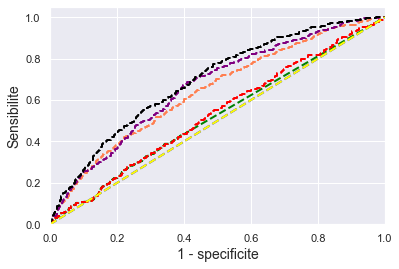

In [99]:
[fpr7nf, tpr7nf, thr7nf] = metrics.roc_curve(y_test1, y_pred_random1)

#Sans nouvelles features
#plt.plot(fpr1, tpr1, color='coral', lw=2)
#plt.plot(fpr2, tpr2, color='blue', lw=2)
#plt.plot(fpr3, tpr3, color='green', lw=2)
#plt.plot(fpr4, tpr4, color='purple', lw=2)
#plt.plot(fpr5, tpr5, color='red', lw=2)
#plt.plot(fpr6, tpr6, color='black', lw=2)
#plt.plot(fpr7, tpr7, color='yellow', lw=2)

#Avec nouvelles features
plt.plot(fpr1nf, tpr1nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr2nf, tpr2nf, color='blue', lw=2,linestyle='--')
plt.plot(fpr3nf, tpr3nf, color='green', lw=2,linestyle='--')
plt.plot(fpr4nf, tpr4nf, color='purple', lw=2,linestyle='--')
plt.plot(fpr5nf, tpr5nf, color='red', lw=2,linestyle='--')
plt.plot(fpr6nf, tpr6nf, color='black', lw=2,linestyle='--')
plt.plot(fpr7nf, tpr7nf, color='yellow', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)